# **AntiVac_tweets_analysis**

In [2]:
# Mount the drive (for Google Colab)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
# file_path = "/content/anti_vac_tweets_data.xlsx"
df = pd.read_excel(file_path)

In [ ]:
df.head()

,overall_sl,file_num,file_sl_b4_combine_rt,Query Id,Query Name,Date,Title,Snippet,Full Text,Url,...,Reach (new),Reddit Score,Reddit Score Upvote Ratio,Reddit Author Karma,Reddit Author Awardee Karma,Reddit Author Awarder Karma,Reddit Comments,Subreddit,Subreddit Subscribers,[Wizard-4] Content Types
0,1,1,4941,2000988289,can-covid,2021-01-01 06:16:18.000,"Starting off 2021 well, week long Zuccing from...","Starting off 2021 well, week long Zuccing from...","Starting off 2021 well, week long Zuccing from...",http://twitter.com/FinAeros/statuses/134489017...,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,4940,2000988289,can-covid,2021-01-01 09:26:32.000,"If WALMART, etc requires Covid Vaccine Card, t...","If WALMART, etc requires Covid Vaccine Card, t...","If WALMART, etc requires Covid Vaccine Card, t...",http://twitter.com/PainDiane/statuses/13449380...,...,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,4939,2000988289,can-covid,2021-01-01 15:37:29.000,#HAPPYNEWYEAR #newbeginnings #COVID19 #Covid #...,#HAPPYNEWYEAR #newbeginnings #COVID19 #Covid #...,#HAPPYNEWYEAR #newbeginnings #COVID19 #Covid #...,http://twitter.com/The__Bruce/statuses/1345031...,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,4938,2000988289,can-covid,2021-01-01 16:14:50.000,Check out jenniespohn's video! #TikTok #covid ...,Check out jenniespohn's video! #TikTok #covid ...,Check out jenniespohn's video! #TikTok #covid ...,http://twitter.com/TJWooster/statuses/13450407...,...,1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,4937,2000988289,can-covid,2021-01-01 18:47:52.000,#ADVENTURES IN #COVID #NEWS REPORTING. #Vaccin...,#ADVENTURES IN #COVID #NEWS REPORTING. #Vaccin...,#ADVENTURES IN #COVID #NEWS REPORTING. #Vaccin...,http://twitter.com/bennel62/statuses/134507930...,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
column_name = 'Title'
text_list = [text for text in df[column_name]]
print(len(text_list))

9904


In [7]:
tweets = text_list[:10]
len(tweets)

10

In [8]:
tweets[0]

'Starting off 2021 well, week long Zuccing from telling an antivaxxer crowing about the destroyed Moderna vaccines that I hope he caught COVID.  @Facebook fuck your auto moderation and polices, how about you clean out the rampant racist, Neo Nazi, and insurrectionist groups?'

In [ ]:
# Installing spaCy is needed for downlaoding the following language models
!pip install spacy

# Download large English model
# !python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_lg

import spacy

# large trained-data model
# nlp = spacy.load('en_core_web_sm')
nlp = spacy.load('en_core_web_lg')

2023-11-11 02:01:21.724691: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-11 02:01:21.724767: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-11 02:01:21.724816: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-11 02:01:21.739131: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-11 02:01:23.565548: W tensorflow/compiler/

In [ ]:
import spacy
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

# Write a pattern
pattern = [{"LEMMA": "anti"}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("SENT_PATTERN", [pattern])

for tweet in tweets:
    doc = nlp(tweet)
    matches = matcher(doc)
    for match_id, start, end in matches:
        # next_token = doc[end + 1]
        print(doc[start:end].text)



In [ ]:
for tweet in text_list:
    doc = nlp(tweet)
    matches = matcher(doc)
    for match_id, start, end in matches:
        next_token = doc[end + 1]
        print(doc[start:end+1].text, next_token.text)

In [ ]:
# Function to remove unwanted characters/texts/url from a text
import re
def remove_unwanted_characters(text):

    # Replace double newline characters with a single newline and put period if there is no period
    pattern = r'([^.])\n\n'
    text = re.sub(pattern, r'\1.\n', text)

    # Replace single newline characters with a space
    text = text.replace("\n", " ")

    # Replace tab characters with a space
    text = text.replace("\t", " ")

    # Replace "x0c" with a space
    text = text.replace("\x0c", " ")

    # Repalce any double spaces with signle space
    text = re.sub(r' +', ' ', text)

    # Remove URLs using re.sub()
    url_pattern = r'https?://\S+|www\.\S+'
    text = re.sub(url_pattern, '', text)

    return text

# Process each document in the list
text_list_clean = [remove_unwanted_characters(document) for document in text_list]

In [ ]:
len(text_list_clean)

9904

In [ ]:
text_list_clean[5]

'Somehow I have a trans antivaxxer/ covid denier as a follower? Who thought they could talk to me?? Or should I say I *had* one such follower, jfc.'

In [ ]:
text_list_clean10 = text_list_clean[:10]

In [ ]:
len(text_list_clean10)

10

In [ ]:
text_list_clean10[0]

'Starting off 2021 well, week long Zuccing from telling an antivaxxer crowing about the destroyed Moderna vaccines that I hope he caught COVID. @Facebook fuck your auto moderation and polices, how about you clean out the rampant racist, Neo Nazi, and insurrectionist groups?'

In [ ]:
for document in text_list_clean[:1]:
  parsed_doc = nlp(document)

  for token in parsed_doc:
    is_adjective = token.pos_ == "ADJ"
    if is_adjective:
      print(token.text, token.pos_ == "ADJ", token.head.text)

@Facebook True fuck
rampant True racist
Neo True Nazi
insurrectionist True groups


In [ ]:
len(text_list_clean)

9904

In [ ]:
print("{:<10} | {:<10} | {:<5} | {:<8} | {:<5} | {:<10} | {:<5} | {:<20} | {:<10}".format(
    'Token_i', 'Token', 't_POS', 'Relation', 'Head_i', 'Head', 'h_POS', 'Children', 'Sentence'))
print("-" * 100)

output = []

for document in text_list_clean:
    parsed_doc = nlp(document)

    for token in parsed_doc:
        # # Print the token, all its heads and children, and their dependency relations
        # print("{:<10} | {:<10} | {:<5} | {:<8} | {:<5} | {:<10} | {:<5} | {:<20} | {:<10}".format(
        #     int(token.i), str(token.text), str(token.pos_), str(token.dep_),
        #     int(token.head.i), str(token.head.text), str(token.head.pos_), str([child for child in token.children]), token.sent.text, document))

        output.append("{:<10} | {:<10} | {:<5} | {:<8} | {:<5} | {:<10} | {:<5} | {:<20} | {:<10}".format(
            int(token.i), str(token.text), str(token.pos_), str(token.dep_),
            int(token.head.i), str(token.head.text), str(token.head.pos_), str([child for child in token.children]), token.sent.text))


Token_i    | Token      | t_POS | Relation | Head_i | Head       | h_POS | Children             | Sentence   | Tweet     
----------------------------------------------------------------------------------------------------


In [ ]:
import csv

output_file_path = "output.csv"  # Change this to the desired file path

with open(output_file_path, "w", newline="", encoding="utf-8") as output_file:
    csv_writer = csv.writer(output_file)

    header = ['Token_i', 'Token', 't_POS', 'Relation', 'Head_i', 'Head', 'h_POS', 'Children', 'Sentence']
    csv_writer.writerow(header)

    for document in text_list_clean:
        parsed_doc = nlp(document)

        for token in parsed_doc:
            row = [
                int(token.i), str(token.text), str(token.pos_), str(token.dep_),
                int(token.head.i), str(token.head.text), str(token.head.pos_),
                str([child for child in token.children]), token.sent.text
            ]
            csv_writer.writerow(row)


In [ ]:
import pandas as pd
# read the CSV output file
df = pd.read_csv('/content/output_large.csv')
print(df.index)
df.head()

RangeIndex(start=0, stop=330648, step=1)


,SL,Token_i,Token,t_POS,Relation,Head_i,Head,h_POS,Children,Sentence
0,1,0,Starting,VERB,ROOT,0,Starting,VERB,"[off, 2021, well, ,, long]","Starting off 2021 well, week long"
1,2,1,off,ADP,prt,0,Starting,VERB,[],"Starting off 2021 well, week long"
2,3,2,2021,NUM,npadvmod,0,Starting,VERB,[],"Starting off 2021 well, week long"
3,4,3,well,ADV,advmod,0,Starting,VERB,[],"Starting off 2021 well, week long"
4,5,4,",",PUNCT,punct,0,Starting,VERB,[],"Starting off 2021 well, week long"


In [ ]:
len(df.Token)

330648

In [ ]:
shooter_keywords = ["antivaxxer", "antimasker", "AntiVaxxer", "AntiMasker", "antiVaxxer/#QAnon", "ANTIVAXXER"]

In [ ]:
df_keywords = df[(df['Head'].isin(shooter_keywords))]
# df_keywords = df[(df['Token'].isin(shooter_keywords)) | (df['Head'].isin(shooter_keywords))]

In [ ]:
df_keywords.head(2)

,SL,Token_i,Token,t_POS,Relation,Head_i,Head,h_POS,Children,Sentence
10,11,10,an,DET,det,11,antivaxxer,NOUN,[],Zuccing from telling an antivaxxer crowing abo...
255,256,5,an,DET,det,7,antivaxxer,NOUN,[],My dad's wife is an #antivaxxer and doubter of...


In [ ]:
# group the DataFrame by Head and Token columns and count the frequency of each token in each group\
# Here, we can check the possible relations we need to include/update

df_grouped = df_keywords.groupby(['Head', 'Token', 'Relation']).size().reset_index(name='count')

# sort the DF by count column in descending order
df_sorted = df_grouped.sort_values(by='count', ascending=False)

# split the DF by Relation column
df_relation_groups = df_sorted.groupby('Relation')

# display the DF for each Relation group
for relation, group_df in df_relation_groups:
    sheet_name = f"{relation}_group"
    print(f"Relation: {relation}")
    print(group_df)

Relation: ROOT
           Head       Token Relation  count
513  antivaxxer  antivaxxer     ROOT     57
75   AntiVaxxer  AntiVaxxer     ROOT     28
7    ANTIVAXXER  ANTIVAXXER     ROOT      2
Relation: acl
           Head       Token Relation  count
83   AntiVaxxer      Called      acl      2
576  antivaxxer    covering      acl      1
695  antivaxxer    infected      acl      1
716  antivaxxer       lying      acl      1
709  antivaxxer    licensed      acl      1
660  antivaxxer     getting      acl      1
884  antivaxxer     telling      acl      1
882  antivaxxer     talking      acl      1
855  antivaxxer     spewing      acl      1
881  antivaxxer      taking      acl      1
944  antivaxxer         was      acl      1
789  antivaxxer     posting      acl      1
739  antivaxxer     moaning      acl      1
749  antivaxxer   murdering      acl      1
850  antivaxxer    speaking      acl      1
829  antivaxxer     running      acl      1
831  antivaxxer      saying      acl      1
801

In [ ]:
# shooter_rels = ['acl', "amod", 'appos', "compound", "relc", 'nsubj', 'dobj', 'nsubjpass']

In [ ]:
import os
import pandas as pd

# List of specific relations to include
desired_relations = ['acl', "amod", 'appos', "compound", "relc", 'nsubj', 'dobj', 'nsubjpass']

# Create a directory to store the CSV files
output_directory = 'relation_groups'
os.makedirs(output_directory, exist_ok=True)


df_filtered = df_keywords[df_keywords['Relation'].isin(desired_relations)]
df_grouped = df_filtered.groupby(['Head', 'Token', 'Relation']).size().reset_index(name='count')
df_sorted = df_grouped.sort_values(by='count', ascending=False)
df_relation_groups = df_sorted.groupby('Relation')

# Save each group to a separate CSV file
for relation, group_df in df_relation_groups:
    relation_filename = os.path.join(output_directory, f"{relation}_group.csv")
    group_df.to_csv(relation_filename, index=False)

for relation, group_df in df_relation_groups:
    print(f"Relation: {relation}")
    print(group_df)



Relation: acl
           Head       Token Relation  count
29   AntiVaxxer      Called      acl      2
336  antivaxxer       lying      acl      1
351  antivaxxer     moaning      acl      1
332  antivaxxer    licensed      acl      1
262  antivaxxer    covering      acl      1
323  antivaxxer    infected      acl      1
300  antivaxxer     getting      acl      1
441  antivaxxer     telling      acl      1
439  antivaxxer     talking      acl      1
438  antivaxxer      taking      acl      1
424  antivaxxer     spewing      acl      1
421  antivaxxer    speaking      acl      1
469  antivaxxer         was      acl      1
382  antivaxxer     posting      acl      1
359  antivaxxer   murdering      acl      1
389  antivaxxer  protesting      acl      1
412  antivaxxer      saying      acl      1
411  antivaxxer     running      acl      1
102  antimasker     wearing      acl      1
49   AntiVaxxer        MAGA      acl      1
33   AntiVaxxer     Charged      acl      1
213  antivaxxer   

In [ ]:
def build_semantic_network(group_df):
    G = nx.Graph()

    # Iterate through the rows of the DataFrame
    for _, row in group_df.iterrows():
        head = row['Head']
        token = row['Token']
        frequency = row['count']

        # Add nodes (words)
        G.add_node(head)
        G.add_node(token)

        # Add an edge with a weight representing frequency
        if G.has_edge(head, token):
            G[head][token]['weight'] += frequency
        else:
            G.add_edge(head, token, weight=frequency)

    return G


In [ ]:
def build_semantic_network(group_df):
    G = nx.Graph()

    # Iterate through the rows of the DataFrame
    for _, row in group_df.iterrows():
        head = row['Head']
        token = row['Token']
        frequency = row['count']

        # Add nodes (words)
        G.add_node(head)
        G.add_node(token)

        # Add an edge with a weight representing frequency
        if G.has_edge(head, token):
            G[head][token]['weight'] += frequency
        else:
            G.add_edge(head, token, weight=frequency)

    return G


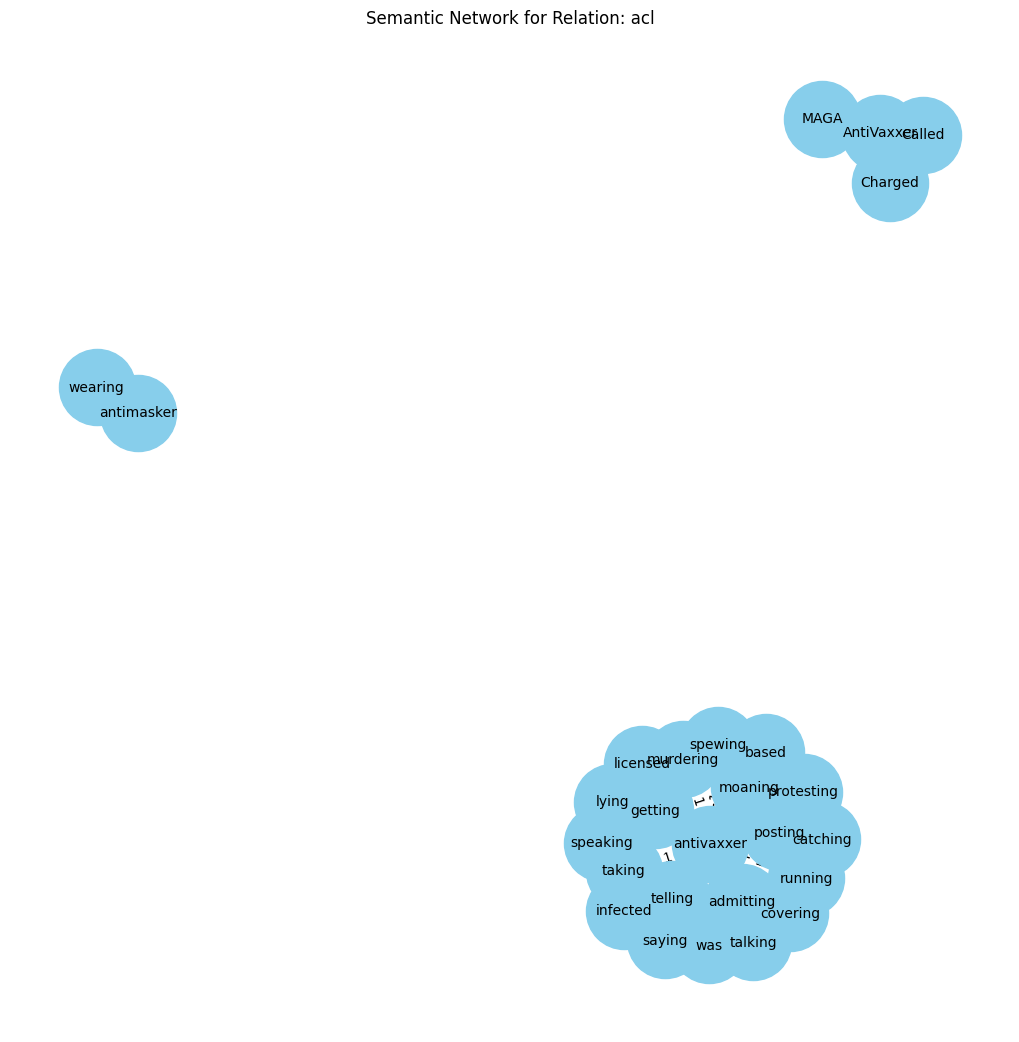

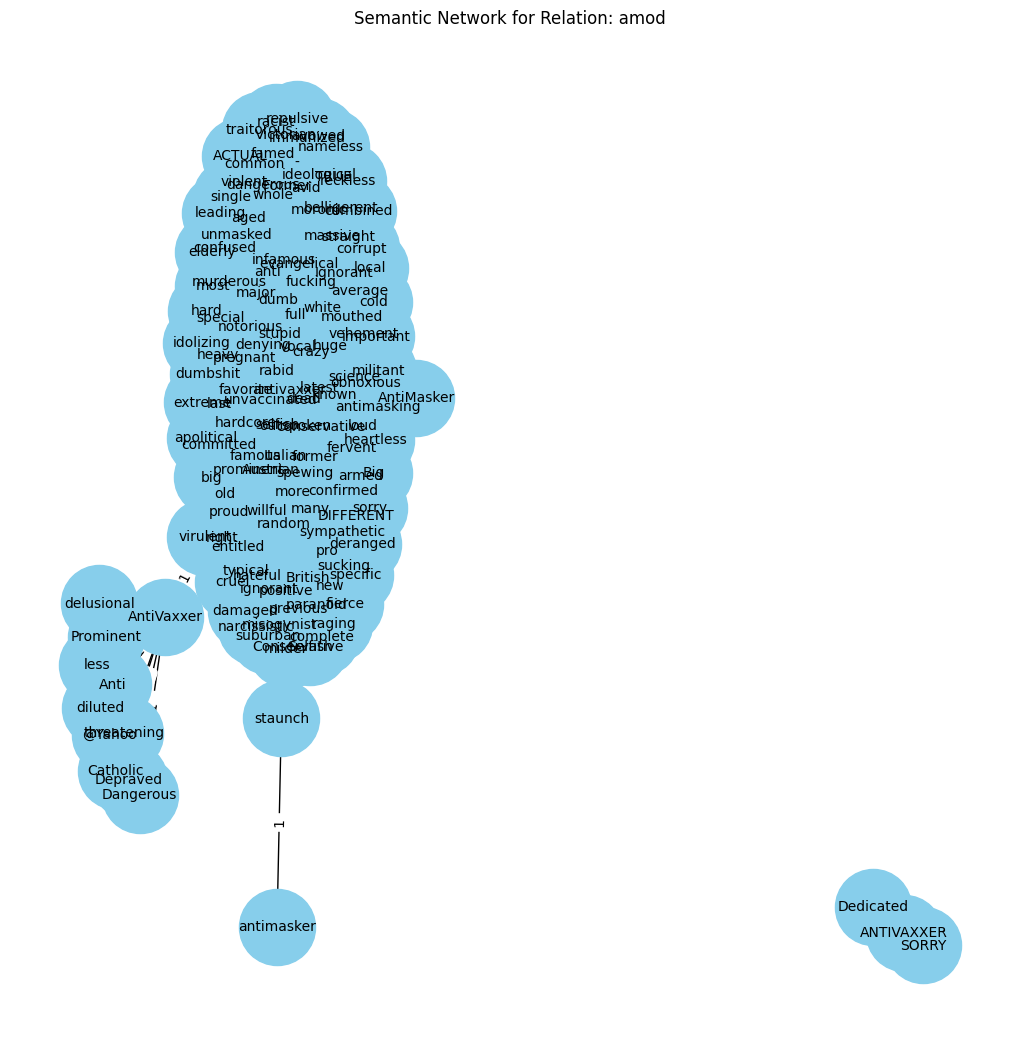

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129324 (\N{SERIOUS FACE WITH SYMBOLS COVERING MOUTH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8294 (\N{LEFT-TO-RIGHT ISOLATE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8297 (\N{POP DIRECTIONAL ISOLATE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129402 (\N{FACE WITH PLEADING EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129326 (\N{FACE WITH OPEN MOUTH VOMITING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

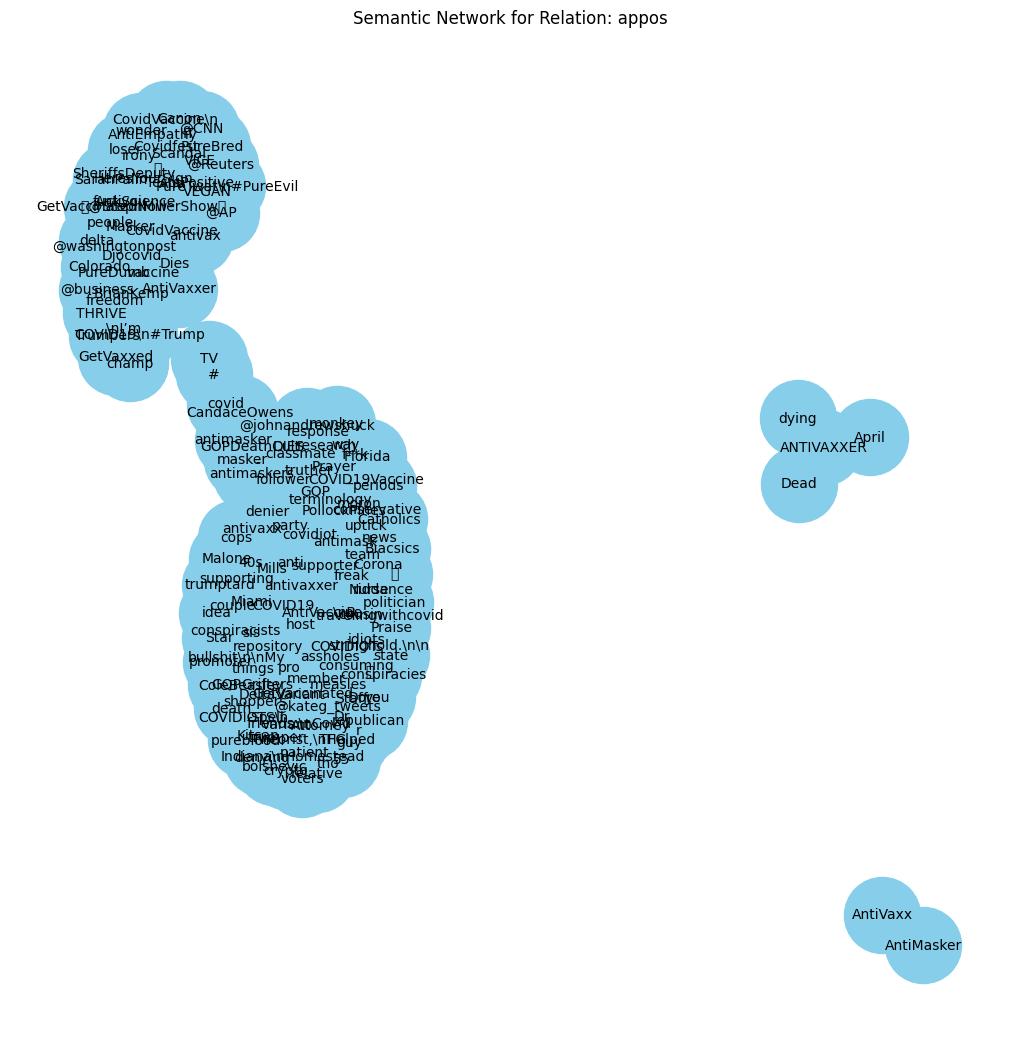

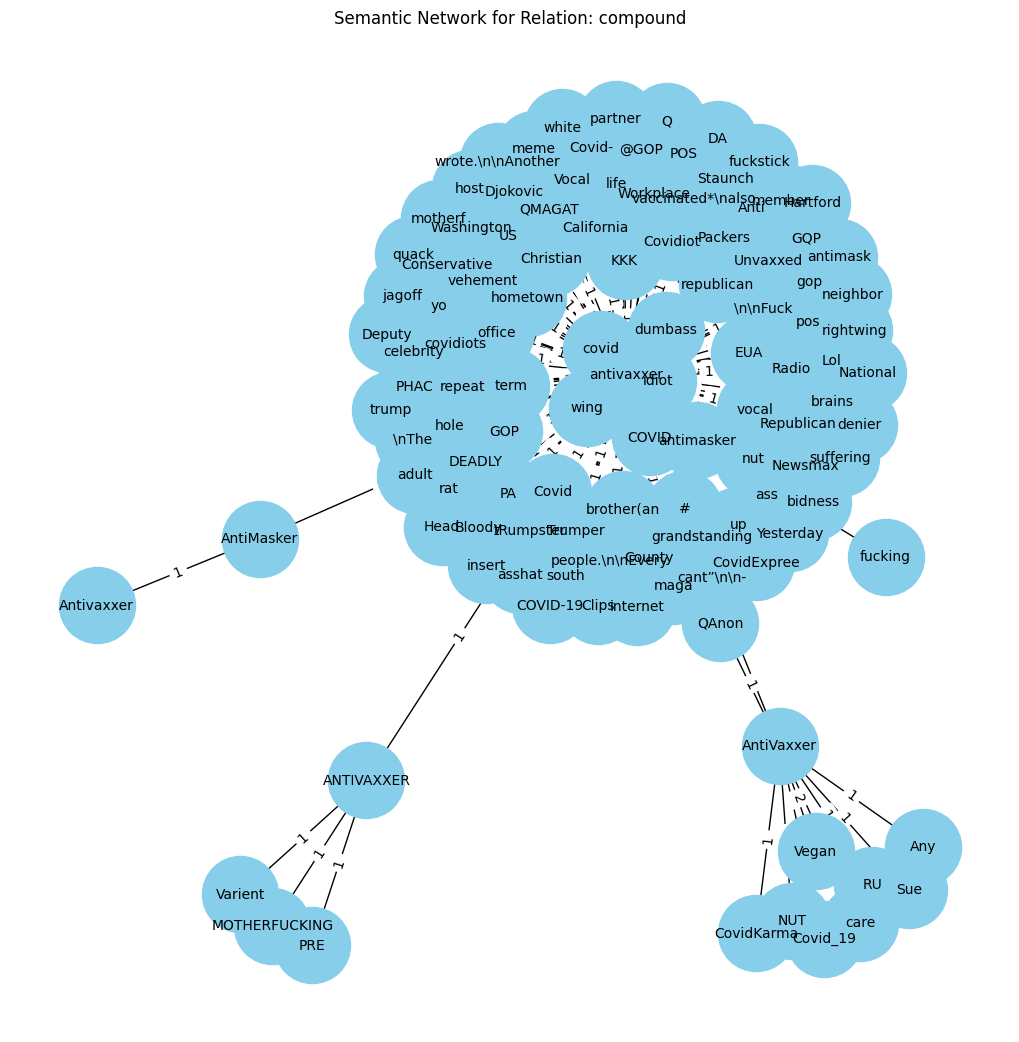

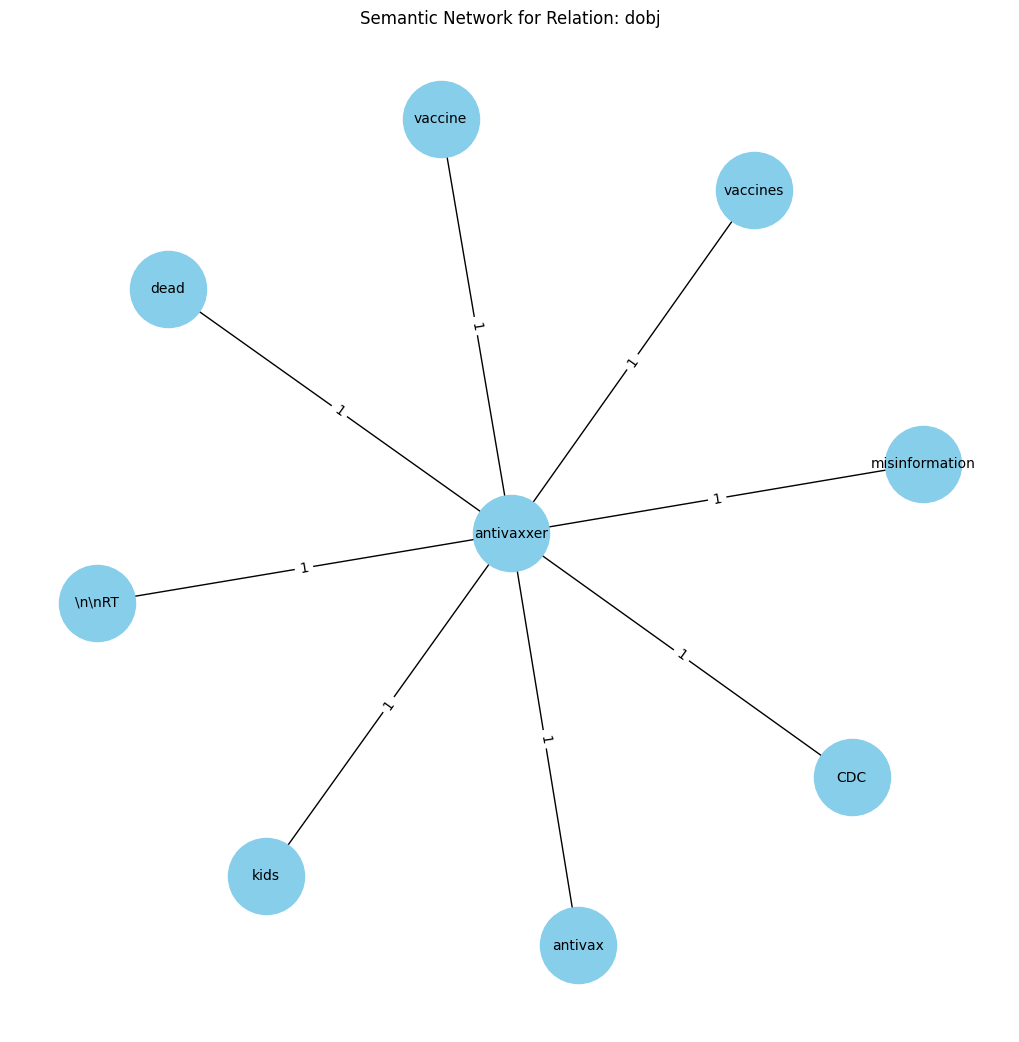

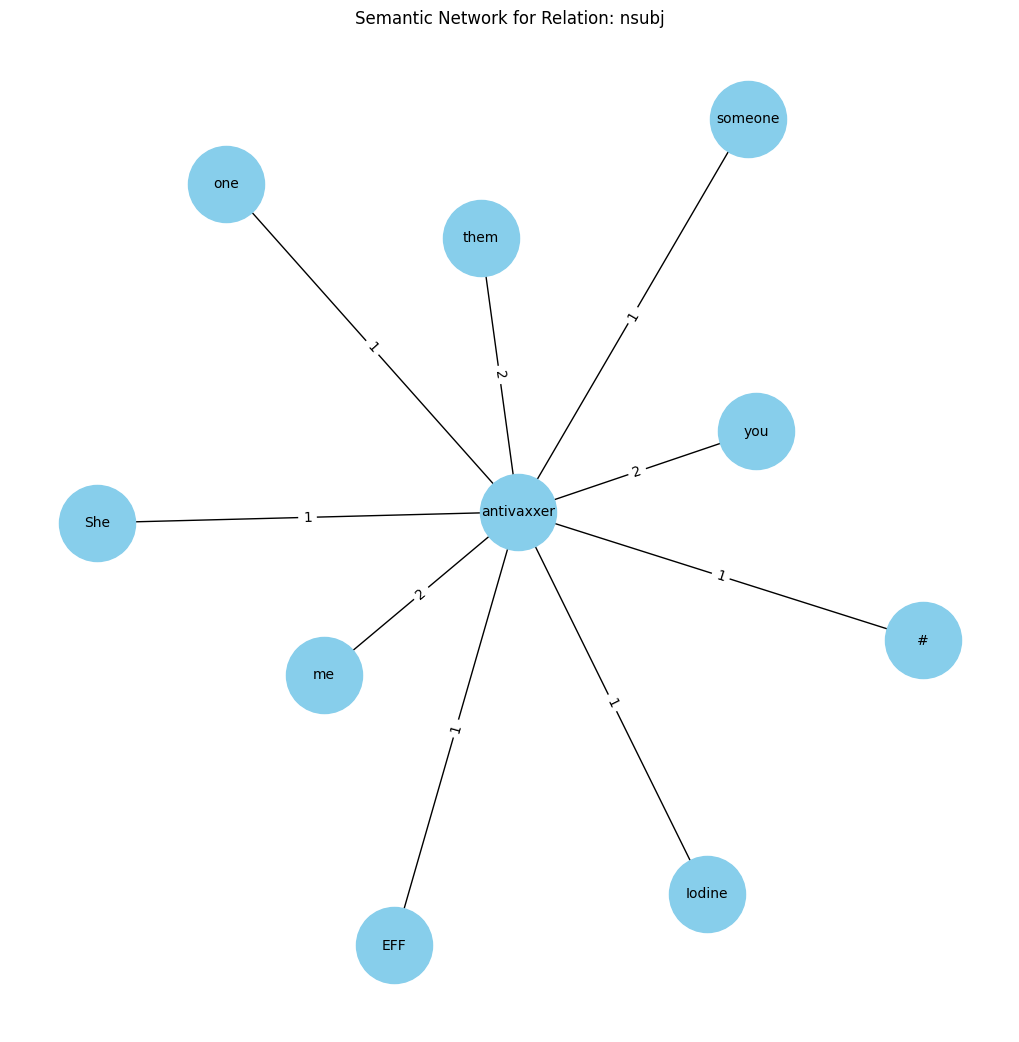

In [ ]:
import os
import pandas as pd
import networkx as nx  # Import networkx library
import matplotlib.pyplot as plt

for relation, group_df in df_relation_groups:
    G = build_semantic_network(group_df)

    # Visualize the network (optional)
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, seed=42)  # Adjust the layout as needed
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)
    plt.title(f"Semantic Network for Relation: {relation}")
    plt.show()


In [ ]:
# SELECT PARTICULAR ENTITY'S RELATIONS

df_keywords_rels = df_keywords[(df_keywords['Relation'].isin(shooter_rels))]
print(len(df_keywords_rels))
df_keywords_rels.head(2)

700


,SL,Token_i,Token,t_POS,Relation,Head_i,Head,h_POS,Children,Sentence
2445,2446,1,notorious,ADJ,amod,2,antivaxxer,NOUN,[],a notorious antivaxxer commented on a joking p...
3225,3226,6,ACTUAL,ADJ,amod,8,antivaxxer,NOUN,[],I have yet to see an ACTUAL true antivaxxer sa...


In [ ]:
!pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# Rels for word cloud
shooter_keywords_wc = ["antivaxxer", "antimasker", "AntiVaxxer", "AntiMasker", "antiVaxxer/#QAnon", "ANTIVAXXER"]

In [ ]:
df_keywords_shooter = df[(df['Head'].isin(shooter_keywords_wc))]


In [ ]:
df_keywords_rels_shooter = df_keywords_shooter[(df_keywords_shooter['Relation'].isin(shooter_rels))]

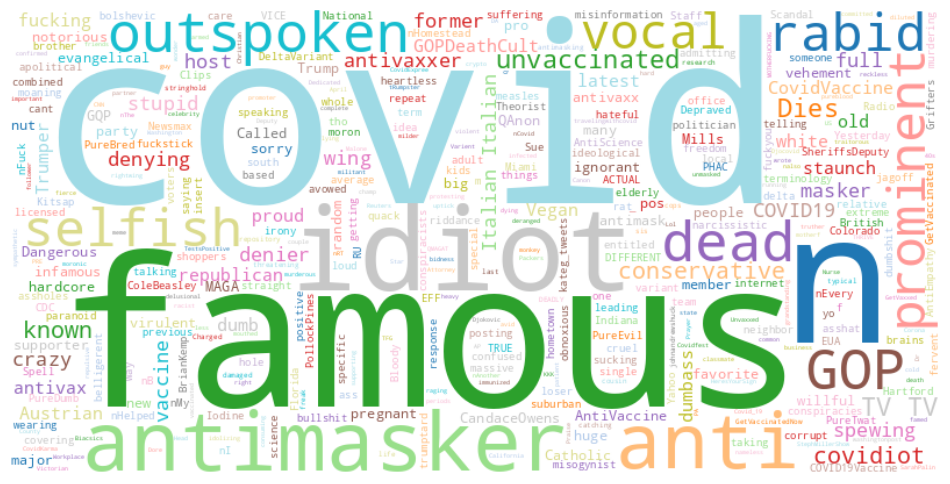

In [ ]:
# for SHOOTER
# combine all the words in the "Token" column into a single string and make word-cloud
text = ' '.join(df_keywords_rels_shooter['Token'].values.tolist())
# text = ' '.join(df['Token'] + ' ' + df['Head'])

# create the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab20', max_words=None, stopwords=None).generate(text)
# wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab20').generate(text)
# wordcloud = WordCloud(background_color="white", width=800, height=400).generate(' '.join(df_keywords_rels['Token']))

# generate the word cloud
# wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab20').generate(text)

# plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()